<a href="https://colab.research.google.com/github/ILLATICI/EnGeL-Theory/blob/main/ammonite_lab/Ammonite_(2023_KQ14)_nFills_the_Gap.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

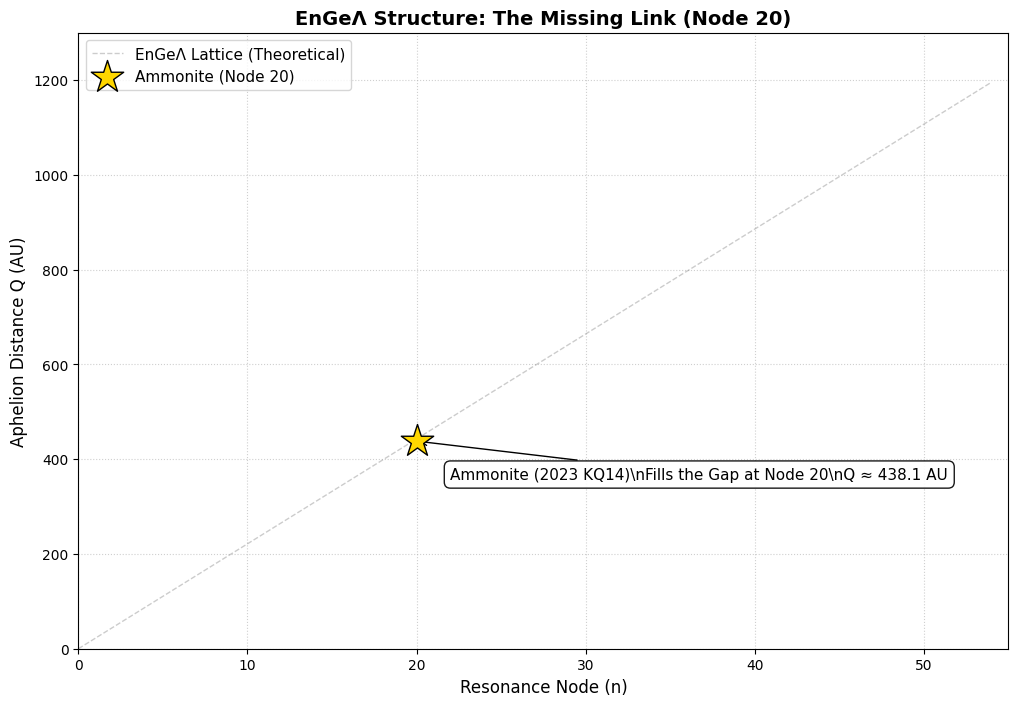

Figure 1 saved: engel_structure.png


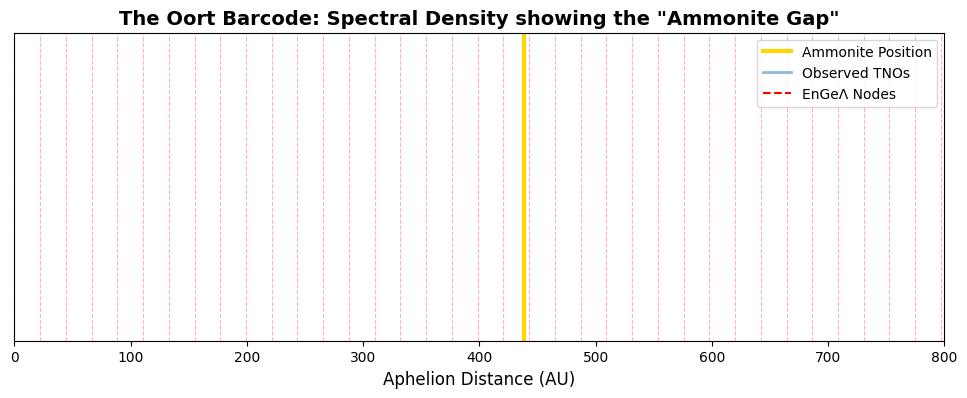

Figure 2 saved: engel_barcode.png


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# ---------------------------------------------------------
# CONFIGURATION & CONSTANTS
# ---------------------------------------------------------
FILE_NAME = 'ammonite_stats.csv'  # Updated path for GitHub folder structure
AMMONITE_Q = 438.1                # Ammonite Aphelion (2023 KQ14)
LATTICE_STEP = 22.14              # EnGeL Lattice Step Constant
COLOR_DOTS = '#1f77b4'            # Standard Blue for TNOs
COLOR_AMMONITE = 'gold'           # Gold for Ammonite
DPI = 300                         # Output Image Quality

# ---------------------------------------------------------
# 1. DATA PREPARATION
# ---------------------------------------------------------
try:
    # Load dataset
    df = pd.read_csv(FILE_NAME)
except FileNotFoundError:
    print(f"Warning: {FILE_NAME} not found. Using empty placeholder.")
    df = pd.DataFrame({'Node (n)': [], 'Aphelion (Q)': []})

# Generate theoretical lattice (0 to 55 nodes)
# Necessary to visualize theoretical steps even if no data exists there
theoretical_nodes = np.arange(0, 55)
theoretical_qs = theoretical_nodes * LATTICE_STEP

# Calculate the node index for Ammonite
ammonite_node_int = round(AMMONITE_Q / LATTICE_STEP)  # Rounds ~19.78 to 20

# ---------------------------------------------------------
# 2. PLOT 1: THE STRUCTURE (LADDER VIEW)
# ---------------------------------------------------------
plt.figure(figsize=(12, 8))

# Plot Theoretical Lattice (Gray Grid)
plt.plot(theoretical_nodes, theoretical_qs, '--',
         color='gray', alpha=0.4, linewidth=1, label='EnGeΛ Lattice (Theoretical)')

# Plot Known TNOs (Blue Dots)
if not df.empty:
    plt.scatter(df['Node (n)'], df['Aphelion (Q)'],
                alpha=0.6, s=25, color=COLOR_DOTS, label=f'Known TNOs (Sample B)')

# Plot Ammonite (Gold Star at Node 20)
plt.scatter(ammonite_node_int, AMMONITE_Q,
            color=COLOR_AMMONITE, marker='*', s=600, edgecolors='black',
            label=f'Ammonite (Node {ammonite_node_int})', zorder=10)

# Annotation with arrow
plt.annotate(f'Ammonite (2023 KQ14)\\nFills the Gap at Node {ammonite_node_int}\\nQ ≈ {AMMONITE_Q} AU',
             xy=(ammonite_node_int, AMMONITE_Q),
             xytext=(ammonite_node_int + 2, AMMONITE_Q - 80),
             arrowprops=dict(facecolor='black', arrowstyle='->'),
             fontsize=11,
             bbox=dict(boxstyle="round,pad=0.4", fc="white", ec="black", alpha=0.9))

plt.xlabel('Resonance Node (n)', fontsize=12)
plt.ylabel('Aphelion Distance Q (AU)', fontsize=12)
plt.title(f'EnGeΛ Structure: The Missing Link (Node {ammonite_node_int})', fontsize=14, fontweight='bold')
plt.legend(loc='upper left', fontsize=11)
plt.grid(True, linestyle=':', alpha=0.6)
plt.xlim(0, 55)    # Show first 55 nodes
plt.ylim(0, 1300)  # Limit Y-axis

# Save figure
plt.savefig('images/engel_structure.png', dpi=DPI, bbox_inches='tight')
plt.show()
print("Figure 1 saved: engel_structure.png")

# ---------------------------------------------------------
# 3. PLOT 2: THE BARCODE (SPECTRAL DENSITY)
# ---------------------------------------------------------
plt.figure(figsize=(12, 4))

# Plot each TNO as a thin blue vertical line
for q in df['Aphelion (Q)']:
    plt.axvline(x=q, color=COLOR_DOTS, alpha=0.08, linewidth=1)

# Plot theoretical lattice as red dashed lines
for q_ideal in theoretical_qs:
    if q_ideal > 1000: break
    plt.axvline(x=q_ideal, color='red', alpha=0.3, linestyle='--', linewidth=0.8)

# Plot Ammonite as a bold gold line
plt.axvline(x=AMMONITE_Q, color=COLOR_AMMONITE, linewidth=3, label='Ammonite Position')

# Dummy lines for legend entries (to fix color display)
plt.plot([], [], color=COLOR_DOTS, alpha=0.5, linewidth=2, label='Observed TNOs')
plt.plot([], [], color='red', linestyle='--', label='EnGeΛ Nodes')

plt.xlim(0, 800) # Zoom on the relevant range
plt.xlabel('Aphelion Distance (AU)', fontsize=12)
plt.yticks([])   # Remove Y-axis ticks
plt.title('The Oort Barcode: Spectral Density showing the "Ammonite Gap"', fontsize=14, fontweight='bold')
plt.legend(loc='upper right')

# Save figure
plt.savefig('images/engel_barcode.png', dpi=DPI, bbox_inches='tight')
plt.show()
print("Figure 2 saved: engel_barcode.png")